In [0]:
# import tensorflow as tf
# from keras import backend as K
# from keras import regularizers, constraints, initializers, activations
# from keras.layers.recurrent import Recurrent
# from keras.engine import InputSpec
 
# tfPrint = lambda d, T: tf.Print(input_=T, data=[T, tf.shape(T)], message=d)

# class AttentionDecoder(Recurrent):
 
#     def __init__(self, units, output_dim,
#                  activation='tanh',
#                  return_probabilities=False,
#                  name='AttentionDecoder',
#                  kernel_initializer='glorot_uniform',
#                  recurrent_initializer='orthogonal',
#                  bias_initializer='zeros',
#                  kernel_regularizer=None,
#                  bias_regularizer=None,
#                  activity_regularizer=None,
#                  kernel_constraint=None,
#                  bias_constraint=None,
#                  **kwargs):
#         """
#         Implements an AttentionDecoder that takes in a sequence encoded by an
#         encoder and outputs the decoded states
#         :param units: dimension of the hidden state and the attention matrices
#         :param output_dim: the number of labels in the output space
 
#         references:
#             Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio.
#             "Neural machine translation by jointly learning to align and translate."
#             arXiv preprint arXiv:1409.0473 (2014).
#         """
#         self.units = units
#         self.output_dim = output_dim
#         self.return_probabilities = return_probabilities
#         self.activation = activations.get(activation)
#         self.kernel_initializer = initializers.get(kernel_initializer)
#         self.recurrent_initializer = initializers.get(recurrent_initializer)
#         self.bias_initializer = initializers.get(bias_initializer)
 
#         self.kernel_regularizer = regularizers.get(kernel_regularizer)
#         self.recurrent_regularizer = regularizers.get(kernel_regularizer)
#         self.bias_regularizer = regularizers.get(bias_regularizer)
#         self.activity_regularizer = regularizers.get(activity_regularizer)
 
#         self.kernel_constraint = constraints.get(kernel_constraint)
#         self.recurrent_constraint = constraints.get(kernel_constraint)
#         self.bias_constraint = constraints.get(bias_constraint)
 
#         super(AttentionDecoder, self).__init__(**kwargs)
#         self.name = name
#         self.return_sequences = True  # must return sequences
 
#     def build(self, input_shape):
#         """
#           See Appendix 2 of Bahdanau 2014, arXiv:1409.0473
#           for model details that correspond to the matrices here.
#         """
 
#         self.batch_size, self.timesteps, self.input_dim = input_shape
 
#         if self.stateful:
#             super(AttentionDecoder, self).reset_states()
 
#         self.states = [None, None]  # y, s
 
#         """
#             Matrices for creating the context vector
#         """
 
#         self.V_a = self.add_weight(shape=(self.units,),
#                                    name='V_a',
#                                    initializer=self.kernel_initializer,
#                                    regularizer=self.kernel_regularizer,
#                                    constraint=self.kernel_constraint)
#         self.W_a = self.add_weight(shape=(self.units, self.units),
#                                    name='W_a',
#                                    initializer=self.kernel_initializer,
#                                    regularizer=self.kernel_regularizer,
#                                    constraint=self.kernel_constraint)
#         self.U_a = self.add_weight(shape=(self.input_dim, self.units),
#                                    name='U_a',
#                                    initializer=self.kernel_initializer,
#                                    regularizer=self.kernel_regularizer,
#                                    constraint=self.kernel_constraint)
#         self.b_a = self.add_weight(shape=(self.units,),
#                                    name='b_a',
#                                    initializer=self.bias_initializer,
#                                    regularizer=self.bias_regularizer,
#                                    constraint=self.bias_constraint)
#         """
#             Matrices for the r (reset) gate
#         """
#         self.C_r = self.add_weight(shape=(self.input_dim, self.units),
#                                    name='C_r',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.U_r = self.add_weight(shape=(self.units, self.units),
#                                    name='U_r',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.W_r = self.add_weight(shape=(self.output_dim, self.units),
#                                    name='W_r',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.b_r = self.add_weight(shape=(self.units, ),
#                                    name='b_r',
#                                    initializer=self.bias_initializer,
#                                    regularizer=self.bias_regularizer,
#                                    constraint=self.bias_constraint)
 
#         """
#             Matrices for the z (update) gate
#         """
#         self.C_z = self.add_weight(shape=(self.input_dim, self.units),
#                                    name='C_z',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.U_z = self.add_weight(shape=(self.units, self.units),
#                                    name='U_z',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.W_z = self.add_weight(shape=(self.output_dim, self.units),
#                                    name='W_z',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.b_z = self.add_weight(shape=(self.units, ),
#                                    name='b_z',
#                                    initializer=self.bias_initializer,
#                                    regularizer=self.bias_regularizer,
#                                    constraint=self.bias_constraint)
#         """
#             Matrices for the proposal
#         """
#         self.C_p = self.add_weight(shape=(self.input_dim, self.units),
#                                    name='C_p',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.U_p = self.add_weight(shape=(self.units, self.units),
#                                    name='U_p',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.W_p = self.add_weight(shape=(self.output_dim, self.units),
#                                    name='W_p',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.b_p = self.add_weight(shape=(self.units, ),
#                                    name='b_p',
#                                    initializer=self.bias_initializer,
#                                    regularizer=self.bias_regularizer,
#                                    constraint=self.bias_constraint)
#         """
#             Matrices for making the final prediction vector
#         """
#         self.C_o = self.add_weight(shape=(self.input_dim, self.output_dim),
#                                    name='C_o',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.U_o = self.add_weight(shape=(self.units, self.output_dim),
#                                    name='U_o',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.W_o = self.add_weight(shape=(self.output_dim, self.output_dim),
#                                    name='W_o',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
#         self.b_o = self.add_weight(shape=(self.output_dim, ),
#                                    name='b_o',
#                                    initializer=self.bias_initializer,
#                                    regularizer=self.bias_regularizer,
#                                    constraint=self.bias_constraint)
 
#         # For creating the initial state:
#         self.W_s = self.add_weight(shape=(self.input_dim, self.units),
#                                    name='W_s',
#                                    initializer=self.recurrent_initializer,
#                                    regularizer=self.recurrent_regularizer,
#                                    constraint=self.recurrent_constraint)
 
#         self.input_spec = [
#             InputSpec(shape=(self.batch_size, self.timesteps, self.input_dim))]
#         self.built = True
#     def _time_distributed_dense(self, x, w, b=None, dropout=None,
#                            input_dim=None, output_dim=None, timesteps=None):
#         '''Apply y.w + b for every temporal slice y of x.
#         '''
#         if not input_dim:
#             # won't work with TensorFlow
#             input_dim = K.shape(x)[2]
#         if not timesteps:
#             # won't work with TensorFlow
#             timesteps = K.shape(x)[1]
#         if not output_dim:
#             # won't work with TensorFlow
#             output_dim = K.shape(w)[1]

#         if dropout:
#             # apply the same dropout pattern at every timestep
#             ones = K.ones_like(K.reshape(x[:, 0, :], (-1, input_dim)))
#             dropout_matrix = K.dropout(ones, dropout)
#             expanded_dropout_matrix = K.repeat(dropout_matrix, timesteps)
#             x *= expanded_dropout_matrix

#         # collapse time dimension and batch dimension together
#         x = K.reshape(x, (-1, input_dim))

#         x = K.dot(x, w)
#         if b:
#             x = x + b
#         # reshape to 3D tensor
#         x = K.reshape(x, (-1, timesteps, output_dim))
#         return x 
#     def call(self, x):
#         # store the whole sequence so we can "attend" to it at each timestep
#         self.x_seq = x
 
#         # apply the a dense layer over the time dimension of the sequence
#         # do it here because it doesn't depend on any previous steps
#         # thefore we can save computation time:
#         self._uxpb = self._time_distributed_dense(self.x_seq, self.U_a, b=self.b_a,
#                                              input_dim=self.input_dim,
#                                              timesteps=self.timesteps,
#                                              output_dim=self.units)
 
#         return super(AttentionDecoder, self).call(x)
 
#     def get_initial_state(self, inputs):
#         # apply the matrix on the first time step to get the initial s0.
#         s0 = activations.tanh(K.dot(inputs[:, 0], self.W_s))
 
#         # from keras.layers.recurrent to initialize a vector of (batchsize,
#         # output_dim)
#         y0 = K.zeros_like(inputs)  # (samples, timesteps, input_dims)
#         y0 = K.sum(y0, axis=(1, 2))  # (samples, )
#         y0 = K.expand_dims(y0)  # (samples, 1)
#         y0 = K.tile(y0, [1, self.output_dim])
 
#         return [y0, s0]
 
#     def step(self, x, states):
 
#         ytm, stm = states
 
#         # repeat the hidden state to the length of the sequence
#         _stm = K.repeat(stm, self.timesteps)
 
#         # now multiplty the weight matrix with the repeated hidden state
#         _Wxstm = K.dot(_stm, self.W_a)
 
#         # calculate the attention probabilities
#         # this relates how much other timesteps contributed to this one.
#         et = K.dot(activations.tanh(_Wxstm + self._uxpb),
#                    K.expand_dims(self.V_a))
#         at = K.exp(et)
#         at_sum = K.sum(at, axis=1)
#         at_sum_repeated = K.repeat(at_sum, self.timesteps)
#         at /= at_sum_repeated  # vector of size (batchsize, timesteps, 1)
 
#         # calculate the context vector
#         context = K.squeeze(K.batch_dot(at, self.x_seq, axes=1), axis=1)
#         # ~~~> calculate new hidden state
#         # first calculate the "r" gate:
 
#         rt = activations.sigmoid(
#             K.dot(ytm, self.W_r)
#             + K.dot(stm, self.U_r)
#             + K.dot(context, self.C_r)
#             + self.b_r)
 
#         # now calculate the "z" gate
#         zt = activations.sigmoid(
#             K.dot(ytm, self.W_z)
#             + K.dot(stm, self.U_z)
#             + K.dot(context, self.C_z)
#             + self.b_z)
 
#         # calculate the proposal hidden state:
#         s_tp = activations.tanh(
#             K.dot(ytm, self.W_p)
#             + K.dot((rt * stm), self.U_p)
#             + K.dot(context, self.C_p)
#             + self.b_p)
 
#         # new hidden state:
#         st = (1-zt)*stm + zt * s_tp
 
#         yt = activations.softmax(
#             K.dot(ytm, self.W_o)
#             + K.dot(stm, self.U_o)
#             + K.dot(context, self.C_o)
#             + self.b_o)
 
#         if self.return_probabilities:
#             return at, [yt, st]
#         else:
#             return yt, [yt, st]
 
#     def compute_output_shape(self, input_shape):
#         """
#             For Keras internal compatability checking
#         """
#         if self.return_probabilities:
#             return (None, self.timesteps, self.timesteps)
#         else:
#             return (None, self.timesteps, self.output_dim)
 
#     def get_config(self):
#         """
#             For rebuilding models on load time.
#         """
#         config = {
#             'output_dim': self.output_dim,
#             'units': self.units,
#             'return_probabilities': self.return_probabilities
#         }
#         base_config = super(AttentionDecoder, self).get_config()
#         return dict(list(base_config.items()) + list(config.items()))

In [0]:
np.random.seed(5151)
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, GRU, Activation
from keras.layers import Dense
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt

In [286]:
url='https://raw.githubusercontent.com/NayantaraPrem/EthereumPricePrediction/master/final_dataset.csv'
df = pd.read_csv(url)
df.head(4)

,Date(UTC),UnixTimeStamp,BlockSize,AvgGasPrices,GasUsed,GasLimit,BlockTime,NetworkUtilization,TransactionFees,BlockDifficulty,NetworkHash,EtherSupply,MarketCap,AddressCount,Price,EthereumGTrends,TweetCount,from_tx_count_dbbf,fromSum_dbbf,from_tx_count_92fe,fromSum_92fe,from_tx_count_fdc0,fromSum_fdc0,from_tx_count_5fc7,fromSum_5fc7,from_tx_count_8258,fromSum_8258,from_tx_count_f0be,fromSum_f0be,from_tx_count_aced,fromSum_aced,from_tx_count_ab89,fromSum_ab89,from_tx_count_769c,fromSum_769c,from_tx_count_a413,fromSum_a413,from_tx_count_6853,fromSum_6853,from_tx_count_92ff,fromSum_92ff,from_tx_count_fb32,fromSum_fb32,from_tx_count_84f3,fromSum_84f3,to_tx_count_dbbf,toSum_dbbf,to_tx_count_92fe,toSum_92fe,to_tx_count_e428,toSum_e428,to_tx_count_fdc0,toSum_fdc0,to_tx_count_5fc7,toSum_5fc7,to_tx_count_8258,toSum_8258,to_tx_count_f0be,toSum_f0be,to_tx_count_aced,toSum_aced,to_tx_count_ab89,toSum_ab89,to_tx_count_769c,toSum_769c,to_tx_count_a413,toSum_a413,to_tx_count_6853,toSum_6853,to_tx_count_92ff,toSum_92ff,to_tx_count_fb32,toSum_fb32,to_tx_count_84f3,toSum_84f3
0,2015-07-30,1438214400,644,0.0,0,0,4.46,0.0,0.0,0.121,11.5297,72049306.59,0.0,9205,0.0,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-31,1438300800,582,0.0,0,0,12.58,0.0,0.0,0.603,51.4594,72085498.31,0.0,9361,0.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-01,1438387200,575,0.0,0,0,16.34,0.0,0.0,0.887,57.7845,72113204.25,0.0,9476,0.0,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-02,1438473600,581,0.0,0,0,16.12,0.0,0.0,1.020,67.9224,72141427.69,0.0,9563,0.0,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
output_column = 'Price'
output_column_feature = 'Price'
X = df.drop(['Date(UTC)', 'UnixTimeStamp'], axis=1)

#drop rows with NaN values
X = X.fillna(0) 
features1 =['TransactionFees','AddressCount','EthereumGTrends','GasUsed','TweetCount']
# from_cols = [col for col in X.columns if 'from' in col]
# to_cols = [col for col in X.columns if 'to' in col]
features = features1 #+ ['toSum_84f3','fromSum_6853','from_tx_count_ab89','toSum_e428','to_tx_count_fdc0','toSum_fdc0','fromSum_fdc0','from_tx_count_8258','fromSum_ab89','fromSum_92ff','fromSum_92f2','from_tx_count_6853']
X['Price']=X['Price'].diff()
n_timesteps = 7
n_features = len(features)
n_outputs = 1 # no. of days to predict
N = len(X)
print(features)

['TransactionFees', 'AddressCount', 'EthereumGTrends', 'GasUsed', 'TweetCount']


In [288]:
train_split = 0.8 #20% test, 80% train
X_train = X[0:round(N*train_split)]
X_test = X[round(N*train_split):]
N_test = X_test.shape[0]
N_train = X_train.shape[0]
len(X_train)

1245

In [289]:
#scale training data
# input = 3 features. Column 4 shifted is output
input_scaler = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = pd.DataFrame(input_scaler.fit_transform(X_train), columns=X_train.columns)
output_scaler = MinMaxScaler(feature_range = (0, 1))
output_scaler.fit(np.array(X_train[output_column]).reshape((N_train,1))) # scaling the output column
X_train_scaled.head()

,BlockSize,AvgGasPrices,GasUsed,GasLimit,BlockTime,NetworkUtilization,TransactionFees,BlockDifficulty,NetworkHash,EtherSupply,MarketCap,AddressCount,Price,EthereumGTrends,TweetCount,from_tx_count_dbbf,fromSum_dbbf,from_tx_count_92fe,fromSum_92fe,from_tx_count_fdc0,fromSum_fdc0,from_tx_count_5fc7,fromSum_5fc7,from_tx_count_8258,fromSum_8258,from_tx_count_f0be,fromSum_f0be,from_tx_count_aced,fromSum_aced,from_tx_count_ab89,fromSum_ab89,from_tx_count_769c,fromSum_769c,from_tx_count_a413,fromSum_a413,from_tx_count_6853,fromSum_6853,from_tx_count_92ff,fromSum_92ff,from_tx_count_fb32,fromSum_fb32,from_tx_count_84f3,fromSum_84f3,to_tx_count_dbbf,toSum_dbbf,to_tx_count_92fe,toSum_92fe,to_tx_count_e428,toSum_e428,to_tx_count_fdc0,toSum_fdc0,to_tx_count_5fc7,toSum_5fc7,to_tx_count_8258,toSum_8258,to_tx_count_f0be,toSum_f0be,to_tx_count_aced,toSum_aced,to_tx_count_ab89,toSum_ab89,to_tx_count_769c,toSum_769c,to_tx_count_a413,toSum_a413,to_tx_count_6853,toSum_6853,to_tx_count_92ff,toSum_92ff,to_tx_count_fb32,toSum_fb32,to_tx_count_84f3,toSum_84f3
0,0.002084,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.0061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000211,0.0,0.0,0.0,0.314120,0.0,0.0,0.000134,0.000135,0.001132,0.0,0.000003,0.598674,0.0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.459574,0.0,0.0,0.000212,0.000156,0.001999,0.0,0.000005,0.598674,0.0094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000181,0.0,0.0,0.0,0.451064,0.0,0.0,0.000249,0.000191,0.002882,0.0,0.000007,0.598674,0.0071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000362,0.0,0.0,0.0,0.460735,0.0,0.0,0.000279,0.000213,0.003758,0.0,0.000008,0.598674,0.0088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
# restructure data: model expects input data X to have shape : samples x timesteps x features
# samples = N - n_timesteps
# each sample is a n_timesteps x n_features matrix of data that is used to make a single prediction
# eg. 7 days worth of daily data if n_timesteps = 7 is used to predict the 8th day value
# Y should be samples x output dimensions
X_train_windows = []
y_train_windows = []
for i in range(N_train - n_timesteps):
    X_train_windows.append(np.array(X_train_scaled.loc[i:i+n_timesteps-1, features]))
    y_train_windows.append(np.array(X_train_scaled.loc[i+n_timesteps, X_train_scaled.columns == output_column]))

X_train_windows = np.array(X_train_windows)
y_train_windows = np.array(y_train_windows)
X_train_windows.shape, y_train_windows.shape

((1238, 7, 5), (1238, 1))

In [0]:
from keras.layers import RepeatVector
#define the model
model = Sequential()

model.add(LSTM(
    10,
    activation='relu',
    input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(1))
model.add(LSTM(10, activation='relu',return_sequences=True))
# model.add(Activation('softmax'))
# , activation='softmax',activity_regularizer= regularizers.l2(0.0001)
model.add(TimeDistributed(Dense(10, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy','binary_accuracy'])

# train model
y_train_windows = y_train_windows.reshape((y_train_windows.shape[0], y_train_windows.shape[1], 1))
history = model.fit(X_train_windows, y_train_windows, epochs=100, verbose=0)


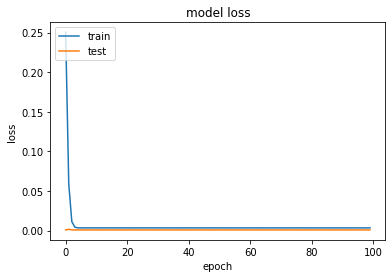

((304, 7, 5), (304, 1))

In [292]:
#print(history.history)
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#scale the input to [0,1]
X_test_scaled = pd.DataFrame(input_scaler.fit_transform(X_test), columns=X_test.columns)

#build the windows
X_test_windows = []
y_test_windows = []
for i in range(N_test - n_timesteps):
    X_test_windows.append(np.array(X_test_scaled.loc[i:i+n_timesteps-1, features]))
    y_test_windows.append(np.array(X_test_scaled.loc[i+n_timesteps, X_test_scaled.columns == output_column]))

X_test_windows = np.array(X_test_windows)
y_test_windows = np.array(y_test_windows)
X_test_windows.shape, y_test_windows.shape

In [293]:
#run predictions on each window
y_pred = []

for X_test_window in X_test_windows:
    y_pred.append(model.predict(X_test_window.reshape(1,n_timesteps,n_features))[0])
    
y_pred = np.array(y_pred)
print(y_pred[0:5],y_test_windows[0:5])
y_pred = y_pred.reshape((y_pred.shape[0],y_pred.shape[1]))
# rescale the predictions back to the original values
y_pred_scaled = output_scaler.inverse_transform(y_pred)
y_actual_scaled = output_scaler.inverse_transform(y_test_windows)

[[[0.6119775 ]]

 [[0.6108705 ]]

 [[0.60760355]]

 [[0.60447127]]

 [[0.6031236 ]]] [[0.76339887]
 [0.48007002]
 [0.66496095]
 [0.57864261]
 [0.60813358]]


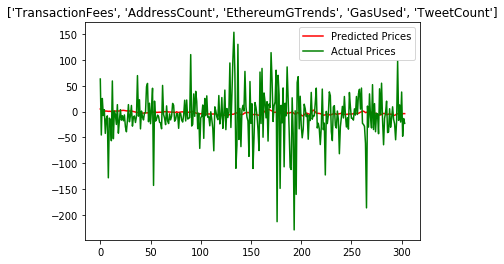

In [294]:
plt.plot(y_pred_scaled, color='red', label='Predicted Prices')
plt.plot(y_actual_scaled, color='green', label='Actual Prices')
plt.title(features1)
plt.legend()
plt.show()


In [295]:
def make_df(y_pred,y_true):
    y_pred.name = 'y_pred'
    y_true.name = 'y_true'
    
    df = pd.concat([y_pred,y_true],axis=1)

    df['sign_pred'] = df.y_pred.apply(np.sign)
    df['sign_true'] = df.y_true.apply(np.sign)
    df['is_correct'] = 0
    df.loc[df.sign_pred * df.sign_true > 0 ,'is_correct'] = 1 # only registers 1 when prediction was made AND it was correct
    df['is_incorrect'] = 0
    df.loc[df.sign_pred * df.sign_true < 0,'is_incorrect'] = 1 # only registers 1 when prediction was made AND it was wrong
    df['is_predicted'] = df.is_correct + df.is_incorrect
    df['result'] = df.sign_pred * df.y_true 
    return df
def calc_scorecard(df):
    scorecard = pd.Series()
    # building block metrics
    scorecard.loc['accuracy'] = df.is_correct.sum()*1. / (df.is_predicted.sum()*1.)*100
    scorecard.loc['edge'] = df.result.mean()
    scorecard.loc['noise'] = df.y_pred.diff().abs().mean()

    # derived metrics
    scorecard.loc['y_true_chg'] = df.y_true.abs().mean()
    scorecard.loc['y_pred_chg'] = df.y_pred.abs().mean()
    scorecard.loc['prediction_calibration'] = scorecard.loc['y_pred_chg']/scorecard.loc['y_true_chg']
    scorecard.loc['capture_ratio'] = scorecard.loc['edge']/scorecard.loc['y_true_chg']*100

    # metrics for a subset of predictions
    scorecard.loc['edge_long'] = df[df.sign_pred == 1].result.mean()  - df.y_true.mean()
    scorecard.loc['edge_short'] = df[df.sign_pred == -1].result.mean()  - df.y_true.mean()

    scorecard.loc['edge_win'] = df[df.is_correct == 1].result.mean()  - df.y_true.mean()
    scorecard.loc['edge_lose'] = df[df.is_incorrect == 1].result.mean()  - df.y_true.mean()

    return scorecard
y_pred_scaled = y_pred_scaled.reshape(y_pred_scaled.shape[0])
y_actual_scaled = y_actual_scaled.reshape(y_actual_scaled.shape[0])
print(y_pred_scaled.shape)
df = make_df(pd.Series(y_pred_scaled),pd.Series(y_actual_scaled))

print(calc_scorecard(df))

(304,)
accuracy                  56.907895
edge                       4.660252
noise                      0.619050
y_true_chg                32.262370
y_pred_chg                 3.209044
prediction_calibration     0.099467
capture_ratio             14.444853
edge_long                 -2.134062
edge_short                15.561505
edge_win                  40.431483
edge_lose                -24.036087
dtype: float64
